<a href="https://colab.research.google.com/github/books-by-chansung/ds-bookcamp/blob/main/notebooks/ds_bookcamp_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p /usr/share/fonts/truetype/nanum
!wget https://github.com/books-by-chansung/ds-bookcamp/blob/main/NanumBarunGothic.ttf?raw=true -O /usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf

--2024-08-15 07:55:50--  https://github.com/books-by-chansung/ds-bookcamp/blob/main/NanumBarunGothic.ttf?raw=true
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/books-by-chansung/ds-bookcamp/raw/main/NanumBarunGothic.ttf [following]
--2024-08-15 07:55:50--  https://github.com/books-by-chansung/ds-bookcamp/raw/main/NanumBarunGothic.ttf
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/books-by-chansung/ds-bookcamp/main/NanumBarunGothic.ttf [following]
--2024-08-15 07:55:51--  https://raw.githubusercontent.com/books-by-chansung/ds-bookcamp/main/NanumBarunGothic.ttf
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.co

In [2]:
# 단계 1: 폰트 설치
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt

fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 18, 'font.family': 'NanumGothic'}) # 폰트 설정

In [8]:
import numpy as np
import itertools

## 4-1

In [15]:
red_cards = 26 * [1]
black_cards = 26 * [0]
unshuffled_deck = red_cards + black_cards
print(unshuffled_deck)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


## 4-2

In [ ]:
np.random.seed(1)
shuffled_deck = np.random.permutation(unshuffled_deck)
print(shuffled_deck)

[0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0 1 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 1
 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0]


## 4-3

In [ ]:
remaining_red_cards = 26
for i, card in enumerate(shuffled_deck[:-1]):
    remaining_red_cards -= card
    remaining_total_cards = 52 - i - 1
    if remaining_red_cards / remaining_total_cards > 0.5:
        break

print(f"{i} 번째 인덱스에서 게임이 종료되었습니다.")
final_card = shuffled_deck[i + 1]
color = 'red' if final_card else 0
print(f"카드 덱의 다음 카드는 {'빨간색' if final_card else '검은색'} 입니다.")
print(f"{'이겼' if final_card else '졌'}습니다!")

0 번째 인덱스에서 게임이 종료되었습니다.
카드 덱의 다음 카드는 빨간색 입니다.
이겼습니다!


## 4-4

In [10]:
np.random.seed(0)
total_cards = 52
total_red_cards = 26
def execute_strategy(min_fraction_red=0.5, shuffled_deck=None, return_index=False):
    if shuffled_deck is None:
        shuffled_deck = np.random.permutation(unshuffled_deck)

    remaining_red_cards = total_red_cards

    for i, card in enumerate(shuffled_deck[:-1]):
        remaining_red_cards -= card
        fraction_red_cards = remaining_red_cards / (total_cards - i - 1)
        if fraction_red_cards > min_fraction_red:
            break

    return (i+1, shuffled_deck[i+1]) if return_index else shuffled_deck[i+1]

## 4-5

In [ ]:
observations = np.array([execute_strategy() for _ in range(1000)])
print(observations)

[0 1 1 0 0 1 1 1 1 1 0 0 1 0 0 1 1 0 0 1 1 0 1 1 0 0 1 1 0 1 1 0 0 1 0 0 0
 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0
 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 0 1 0 1 0 1
 1 0 0 0 0 1 0 1 0 0 0 0 1 1 1 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0 1 0 0 1 1 1 0
 0 1 1 1 0 0 1 0 1 1 0 1 0 0 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 0 0 1 0 1 1
 0 0 0 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 0 0 1 1 1 0 1 1 0 0 0 1
 0 0 0 0 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0
 1 1 1 0 1 1 0 1 1 1 0 0 0 1 1 0 1 0 1 1 0 0 1 1 0 0 1 1 0 0 0 1 0 0 1 0 0
 1 0 0 0 0 0 0 1 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 1
 0 0 1 1 0 1 1 0 0 1 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 0 1 1 0 0 0 1 1 1
 0 1 1 0 1 0 0 1 0 1 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 0 1 0 0 1 1 1 1 1 0 1
 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0
 1 1 0 1 1 0 1 0 0 0 1 0 1 1 0 1 1 0 0 1 0 1 0 1 0 1 1 0 0 0 1 1 1 1 1 0 1
 0 1 1 0 1 1 0 1 0 1 0 1 

## 4-6

In [ ]:
frequency_wins = observations.sum() / 1000
assert frequency_wins == observations.mean()
print(f"이긴 빈도는 {frequency_wins} 입니다.")

이긴 빈도는 0.511 입니다.


## 4-7

In [ ]:
dollars_won = frequency_wins * 1000
dollars_lost = (1 - frequency_wins) * 1000
total_profit = dollars_won - dollars_lost
print(f"총 수익은 ${total_profit:.2f} 입니다.")

총 수익은 $22.00 입니다.


## 4-8

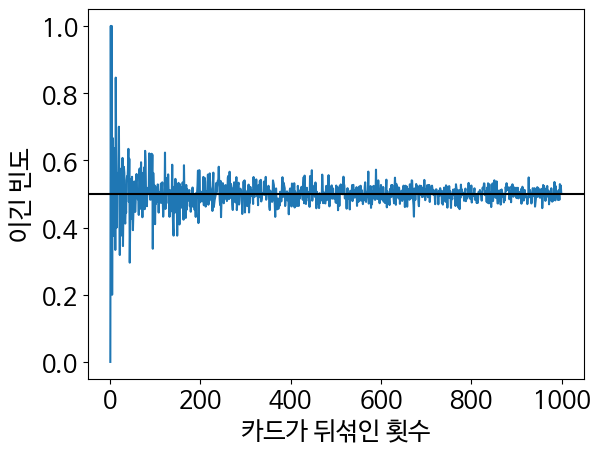

10,000번의 뒤섞기로 얻은 이긴 빈도 0.5035035035035035 입니다.


In [ ]:
np.random.seed(0)
def repeat_game(number_repeats):
    observations = np.array([execute_strategy() for _ in range(number_repeats)])
    return observations.mean()

frequencies = []
for i in range(1, 1000):
    frequencies.append(repeat_game(i))

plt.plot(list(range(1, 1000)), frequencies)
plt.axhline(0.5, color='k')
plt.xlabel('카드가 뒤섞인 횟수')
plt.ylabel('이긴 빈도')
plt.show()
print(f"10,000번의 뒤섞기로 얻은 이긴 빈도 {frequencies[-1]} 입니다.")

## 4-9

In [ ]:
# from 코드 3-28
def compute_high_confidence_interval(likelihoods, bin_width):
    peak_index = likelihoods.argmax()
    area = likelihoods[peak_index] * bin_width
    start_index, end_index = peak_index, peak_index + 1
    while area < 0.95:
        if start_index > 0:
            start_index -= 1
        if end_index < likelihoods.size - 1:
            end_index += 1

        area = likelihoods[start_index: end_index + 1].sum() * bin_width

    range_start, range_end = bin_edges[start_index], bin_edges[end_index]
    range_string = f"{range_start:.6f} - {range_end:.6f}"
    print((f"빈도 범위 {range_string}는 {100 * area:.2f}% 신뢰 구간을 나타냅니다. "))
    return start_index, end_index

빈도 범위 0.488938 - 0.509494는 97.00% 신뢰 구간을 나타냅니다. 


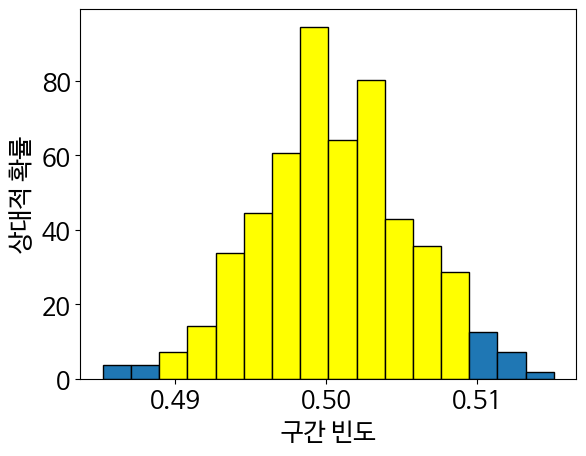

In [ ]:
np.random.seed(0)
frequency_array = np.array([repeat_game(10000) for _ in range(300)])

likelihoods, bin_edges, patches = plt.hist(frequency_array, bins='auto',
edgecolor='black', density=True)
bin_width = bin_edges[1] - bin_edges[0]

start_index, end_index = compute_high_confidence_interval(likelihoods, bin_width)

for i in range(start_index, end_index):
    patches[i].set_facecolor('yellow')
plt.xlabel('구간 빈도')
plt.ylabel('상대적 확률')

plt.show()

## 4-10

In [ ]:
np.random.seed(0)

frequency_array = np.array([repeat_game(50000) for _ in range(3000)])
likelihoods, bin_edges = np.histogram(frequency_array, bins='auto', density=True)
bin_width = bin_edges[1] - bin_edges[0]
compute_high_confidence_interval(likelihoods, bin_width)

빈도 범위 0.495601 - 0.504345는 96.03% 신뢰 구간을 나타냅니다. 


(11, 32)

## 4-11

In [ ]:
np.random.seed(0)
def repeat_game(number_repeats, min_red_fraction):
    observations = np.array([execute_strategy(min_red_fraction) for _ in range(number_repeats)])
    return observations.mean()

frequency_array = np.array([repeat_game(50000, 0.75) for _ in range(3000)])
likelihoods, bin_edges = np.histogram(frequency_array, bins='auto', density=True)
bin_width = bin_edges[1] - bin_edges[0]
compute_high_confidence_interval(likelihoods, bin_width)

빈도 범위 0.495535 - 0.504344는 96.43% 신뢰 구간을 나타냅니다. 


(9, 30)

## 4-12

In [7]:
# from 코드 1-5
def get_matching_event(event_condition, sample_space):
    return set([outcome for outcome in sample_space
                if event_condition(outcome)])

# from 코드 1-11
def compute_event_probability(event_condition, generic_sample_space):
    event = get_matching_event(event_condition, generic_sample_space)
    if type(generic_sample_space) == type(set()):
        return len(event) / len(generic_sample_space)

    event_size = sum(generic_sample_space[outcome]
                    for outcome in event)
    return event_size / sum(generic_sample_space.values())

In [11]:
total_cards = 10
total_red_cards = int(total_cards / 2)
total_black_cards = total_red_cards
unshuffled_deck = [1] * total_red_cards + [0] * total_black_cards
sample_space = set(itertools.permutations(unshuffled_deck))
win_condition = lambda x: execute_strategy(shuffled_deck=np.array(x))
prob_win = compute_event_probability(win_condition, sample_space)
print(f"승리할 확률은 {prob_win} 입니다.")

승리할 확률은 0.5 입니다.


## 4-13

In [12]:
def scan_strategies():
    fractions = [value / 100 for value in range(50, 100)]
    probabilities = []
    for frac in fractions:
        win_condition = lambda x: execute_strategy(frac, shuffled_deck=np.array(x))
        probabilities.append(compute_event_probability(win_condition, sample_space))
    return probabilities

probabilities = scan_strategies()
print(f"승리할 가장 낮은 확률은 {min(probabilities)} 입니다.")
print(f"승리할 가장 높은 확률은 {max(probabilities)} 입니다")

승리할 가장 낮은 확률은 0.5 입니다.
승리할 가장 높은 확률은 0.5 입니다


## 4-14

In [13]:
for total_cards in [2, 4, 6, 8]:
    total_red_cards = int(total_cards / 2)
    total_black_cards = total_red_cards
    unshuffled_deck = [1] * total_red_cards + [0] * total_black_cards

    sample_space = set(itertools.permutations(unshuffled_deck))
    probabilities = scan_strategies()
    if all(prob == 0.5 for prob in probabilities):
        print(f"크기가 {total_cards}인 카드 덱에 대한 승리 전략은 발견되지 않았습니다.")
    else:
        print(f"크기가 {total_cards}인 카드 덱에 대한 승리 전략이 발견되었습니다.")

크기가 2인 카드 덱에 대한 승리 전략은 발견되지 않았습니다.
크기가 4인 카드 덱에 대한 승리 전략은 발견되지 않았습니다.
크기가 6인 카드 덱에 대한 승리 전략은 발견되지 않았습니다.
크기가 8인 카드 덱에 대한 승리 전략은 발견되지 않았습니다.


## 4-15

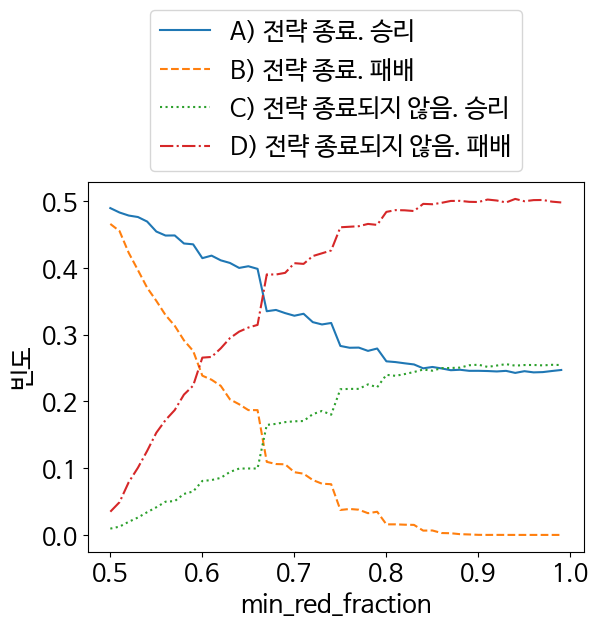

In [22]:
np.random.seed(0)
total_cards = 52
total_red_cards = 26
unshuffled_deck = red_cards + black_cards

def repeat_game_detailed(number_repeats, min_red_fraction):
    observations = [execute_strategy(min_red_fraction, return_index=True) for _ in range(num_repeats)]
    successes = [index for index, card, in observations if card == 1]
    halt_success = len([index for index in successes if index != 51])
    no_halt_success = len(successes) - halt_success

    failures = [index for index, card, in observations if card == 0]
    halt_failure = len([index for index in failures if index != 51])
    no_halt_failure = len(failures) - halt_failure
    result = [halt_success, halt_failure, no_halt_success, no_halt_failure]
    return [r / number_repeats for r in result]

fractions = [value / 100 for value in range(50, 100)]
num_repeats = 50000
result_types = [[], [], [], []]

for fraction in fractions:
    result = repeat_game_detailed(num_repeats, fraction)
    for i in range(4):
        result_types[i].append(result[i])

plt.plot(fractions, result_types[0], label='A) 전략 종료. 승리')
plt.plot(fractions, result_types[1], linestyle='--',  label='B) 전략 종료. 패배')
plt.plot(fractions, result_types[2], linestyle=':', label='C) 전략 종료되지 않음. 승리')
plt.plot(fractions, result_types[3], linestyle='-.', label='D) 전략 종료되지 않음. 패배')
plt.xlabel('min_red_fraction')
plt.ylabel('빈도')
plt.legend(bbox_to_anchor=(0.5, 1.5), loc='upper center')
plt.show()

## 4-16

In [ ]:
def optimal_strategy(shuffled_deck):
    return shuffled_deck[0]